<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span></li><li><span><a href="#a" data-toc-modified-id="a-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>a</a></span></li></ul></div>

# Linear regression motivation

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [2]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [13]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [4]:
data.sample(5)

,hours,mark
27,196,33
42,81,13
32,18,39
40,640,61
94,686,93


In [10]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

<AxesSubplot:xlabel='hours', ylabel='Count'>

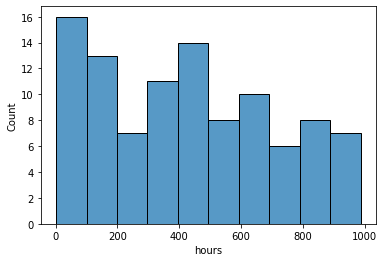

In [6]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='hours', ylabel='mark'>

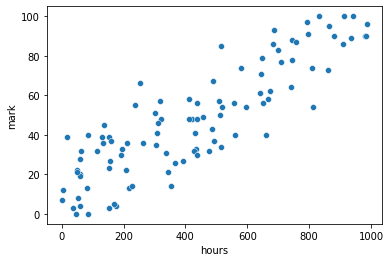

In [7]:
sns.scatterplot(x=data["hours"], y=data["mark"])

## The linear model

Lets try a linear regression $$Y = m * X + n$$

y = 0.095 * x + 2

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

$$mark = $$

$$mark_2 =$$

Which model performs better?

In [12]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [49]:
data["prediction_1"] = 0.1 * data.hours + 5

In [50]:
data["prediction_2"] = 0.09 * data.hours + 10

In [51]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [52]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,91.5,87.85,42.33,12.25,229.5225,2239.1824
1,4,12,5.4,10.36,55.27,43.56,92.9296,1542.1329
2,305,35,35.5,37.45,57.26,0.25,30.8025,66.2596
3,437,56,48.7,49.33,55.45,53.29,215.2089,108.7849
4,682,86,73.2,71.38,57.37,163.84,511.6644,1993.6225
5,560,40,61.0,60.40,43.74,441.00,153.7600,65.4481
6,367,26,41.7,43.03,44.06,246.49,81.5409,788.4864
7,861,73,91.1,87.49,53.24,327.61,42.1201,182.7904
8,59,20,10.9,15.31,52.18,82.81,161.0361,1170.3241
9,514,85,56.4,56.26,52.18,817.96,1349.8276,1094.2864


Lets measure error of both models

Lets compute **Mean squared error**     Penaliza muchísimo errores grandes

In [53]:
data['error_1'] = (data.mark - data.prediction_1) ** 2

In [54]:
data['error_2'] = (data.mark - data.prediction_2)  ** 2

In [55]:
data['error_3'] = (data.mark - data.prediction_3) ** 2

In [56]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,91.5,87.85,42.33,12.25,51.1225,2774.1289
1,4,12,5.4,10.36,55.27,43.56,2.6896,1872.2929
2,305,35,35.5,37.45,57.26,0.25,6.0025,495.5076
3,437,56,48.7,49.33,55.45,53.29,44.4889,0.3025
4,682,86,73.2,71.38,57.37,163.84,213.7444,819.6769
5,560,40,61.0,60.40,43.74,441.00,416.1600,13.9876
6,367,26,41.7,43.03,44.06,246.49,290.0209,326.1636
7,861,73,91.1,87.49,53.24,327.61,209.9601,390.4576
8,59,20,10.9,15.31,52.18,82.81,21.9961,1035.5524
9,514,85,56.4,56.26,52.18,817.96,825.9876,1077.1524


In [57]:
data.error_1.mean()

208.9816

In [58]:
data.error_2.mean()

192.25725599999998

In [59]:
data.error_3.mean()

805.6799179999999

So model 2 performs better!

Lets plot our models

$$mark = $$

$$mark_2 =$$

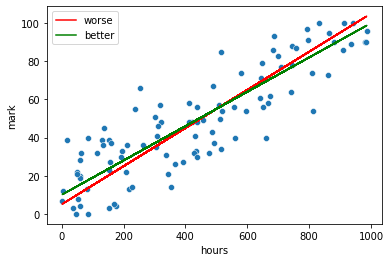

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')

plt.legend()

$$mark = m * hours + n$$

$$\text{model_error} = L(m, n)$$

$$L(0.1, 0) = $$

$$L(0.09, 5) =$$

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [65]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,91.5,87.85,42.33,12.25,51.1225,2774.1289
1,4,12,5.4,10.36,55.27,43.56,2.6896,1872.2929
2,305,35,35.5,37.45,57.26,0.25,6.0025,495.5076
3,437,56,48.7,49.33,55.45,53.29,44.4889,0.3025
4,682,86,73.2,71.38,57.37,163.84,213.7444,819.6769


In [66]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column

lr.fit(
    # X = data[["hours", "age", "n_bedrooms"]],
    X = data[["hours"]],
    y = data.mark
)

LinearRegression()

$$mark = m * hours + n$$

In [67]:
lr.coef_

array([0.08437787])

In [68]:
optimal_m = lr.coef_[0]

In [69]:
optimal_m

0.08437787096170372

In [70]:
optimal_n = lr.intercept_

In [71]:
optimal_n

11.78070717807148

$$mark = $$

In [72]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,91.5,87.85,42.33,12.25,51.1225,2774.1289
1,4,12,5.4,10.36,55.27,43.56,2.6896,1872.2929
2,305,35,35.5,37.45,57.26,0.25,6.0025,495.5076
3,437,56,48.7,49.33,55.45,53.29,44.4889,0.3025
4,682,86,73.2,71.38,57.37,163.84,213.7444,819.6769


In [79]:
data["best_prediction"] = (data.hours * optimal_m + optimal_n).round(2)

In [80]:
data["best_prediction_error"] = (data.best_prediction - data.mark).abs() ** 2

In [81]:
data.shape

(100, 10)

In [82]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,best_prediction,best_prediction_error
0,865,95,91.5,87.85,42.33,12.25,51.1225,2774.1289,84.77,104.6529
1,4,12,5.4,10.36,55.27,43.56,2.6896,1872.2929,12.12,0.0144
2,305,35,35.5,37.45,57.26,0.25,6.0025,495.5076,37.52,6.3504
3,437,56,48.7,49.33,55.45,53.29,44.4889,0.3025,48.65,54.0225
4,682,86,73.2,71.38,57.37,163.84,213.7444,819.6769,69.33,277.8889


In [83]:
data.best_prediction_error.mean()

189.308348

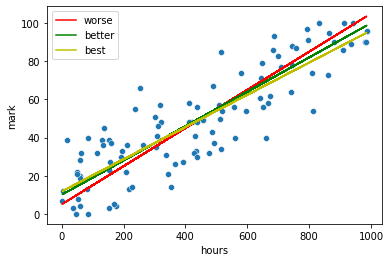

In [86]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

In [ ]:
data2 = pd.DataFrame({"boxes": [100, 150, 160, 90, 220], "pred_1": [105, 153, 172, 93, 244], "pred_2": [98, 146, 166, 88, 214]})